### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-03,402005,3970744,605493,523587,233580,128471,127637,134987,111339,91040,80911,108314,84627,4847,192687
2021-07-04,402728,3977133,605526,524417,233622,128486,127649,135637,111348,91039,80911,108896,84792,4847,193230
2021-07-05,403281,3984595,605572,525112,233689,128495,127680,136279,111385,91068,80934,109466,84949,4848,193389
2021-07-06,404211,3993160,605906,526892,233958,128532,127704,137005,111420,91118,80952,110019,85095,4848,193588
2021-07-07,405028,4001746,606218,528540,234192,128565,127718,137718,111448,91148,80969,110578,85261,4848,193743


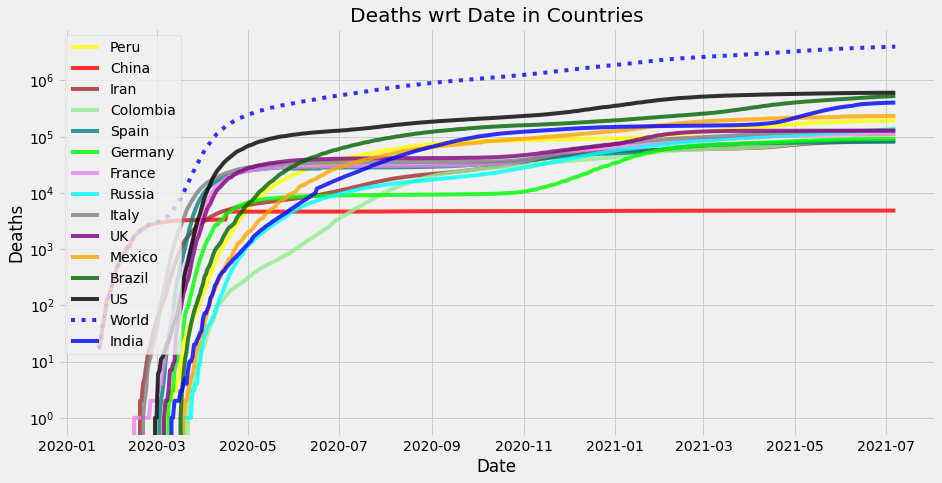

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-03,43071,375056,4739,54556,6265,24465,929,24003,3006,429,0,26928,8341,16,0
2021-07-04,39796,326855,3697,27783,2611,23896,806,24693,2549,411,0,26265,13781,25,7559
2021-07-05,34703,371772,5528,22703,1805,27106,480,23895,802,392,32607,25366,16025,24,1564
2021-07-06,43733,453745,24224,62504,7989,28629,907,22926,3588,713,14137,26721,16080,58,2374
2021-07-07,45892,463849,22931,54022,8507,32061,1010,23510,4083,992,17384,24229,17212,18,2586


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-03,76523,402994,14742,63563,4087,14828,1539,17257,2646,1721,5297,27387,10772,22,2924
2021-07-04,74074,397918,14006,61177,3989,15432,1490,17753,2640,1634,4944,27312,10972,23,3233
2021-07-05,71450,396175,13440,58612,3843,16210,1422,18162,2517,1551,6788,27182,11309,23,3122
2021-07-06,69602,400013,14159,58872,4119,17038,1388,18480,2588,1495,7278,27151,11627,25,3072
2021-07-07,68021,404268,14744,58549,4412,18040,1363,18815,2688,1462,7952,26956,11999,24,3040


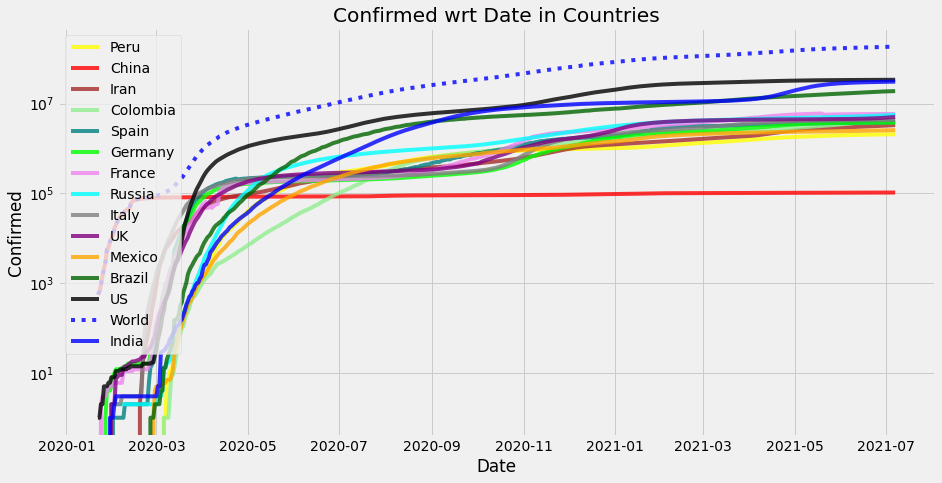

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-03,955,6842,80,1635,152,18,22,685,17,8,0,591,111,0,0
2021-07-04,723,6389,33,830,42,15,12,650,9,-1,0,582,165,0,543
2021-07-05,553,7462,46,695,67,9,31,642,37,29,23,570,157,1,159
2021-07-06,930,8565,334,1780,269,37,24,726,35,50,18,553,146,0,199
2021-07-07,817,8586,312,1648,234,33,14,713,28,30,17,559,166,0,155


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-03,1256.04,8214.10,275.16,1741.82,183.35,16.97,31.61,587.39,35.77,48.92,19.78,617.73,129.11,0.07,189.18
2021-07-04,1189.41,7985.96,244.89,1627.84,165.68,16.72,29.16,595.22,32.42,42.68,17.31,613.26,133.60,0.06,233.41
2021-07-05,1109.86,7920.47,220.03,1511.24,153.35,15.76,29.39,601.06,33.00,40.97,18.02,607.86,136.52,0.18,224.11
2021-07-06,1087.37,8001.03,234.28,1544.83,167.80,18.41,28.72,616.68,33.25,42.10,18.02,601.00,137.71,0.15,220.97
2021-07-07,1053.58,8074.15,243.99,1557.73,176.08,20.24,26.88,628.72,32.59,40.59,17.89,595.75,141.24,0.14,212.72


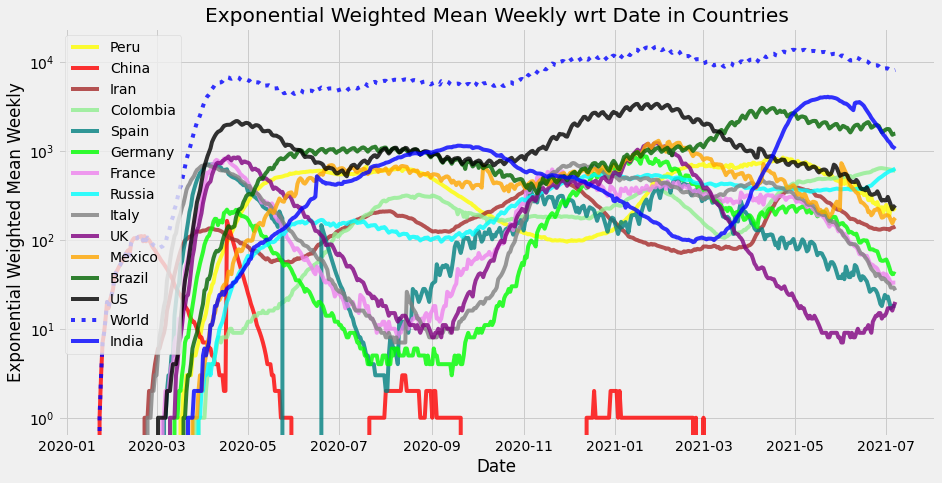

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

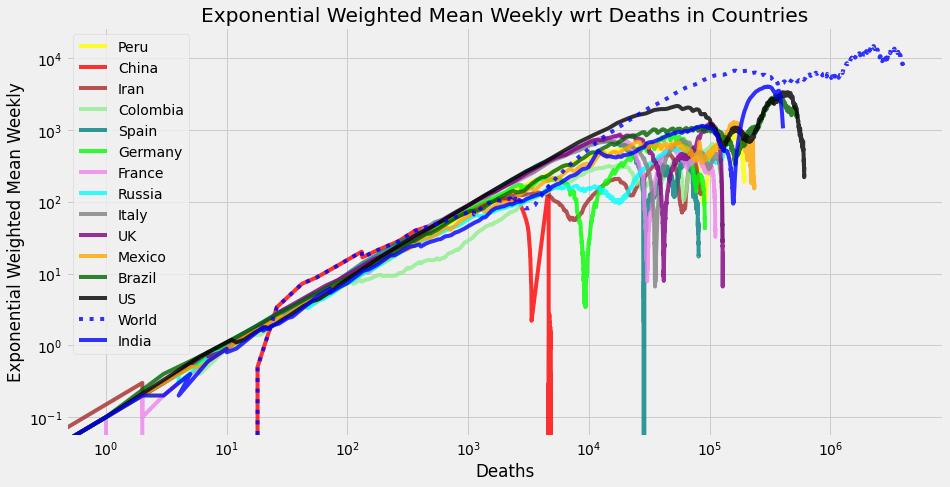

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

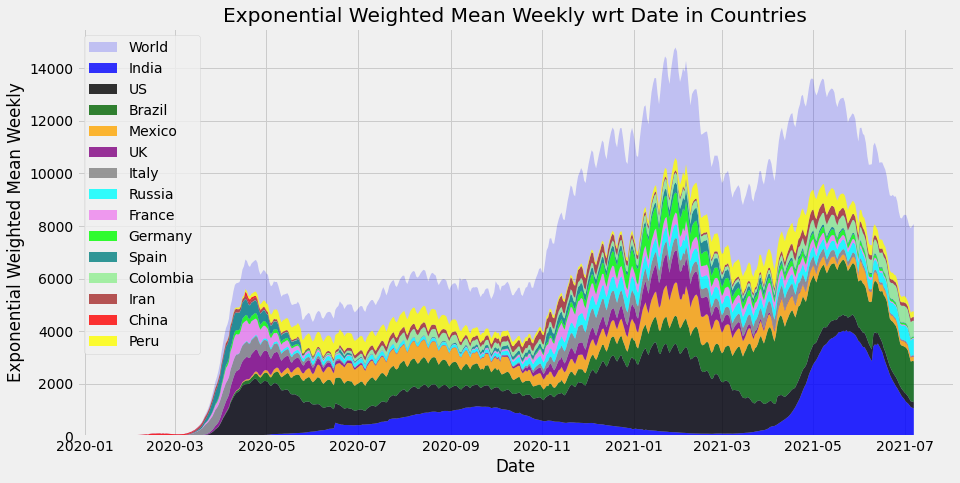

In [20]:
stackplotter(AVG, name)

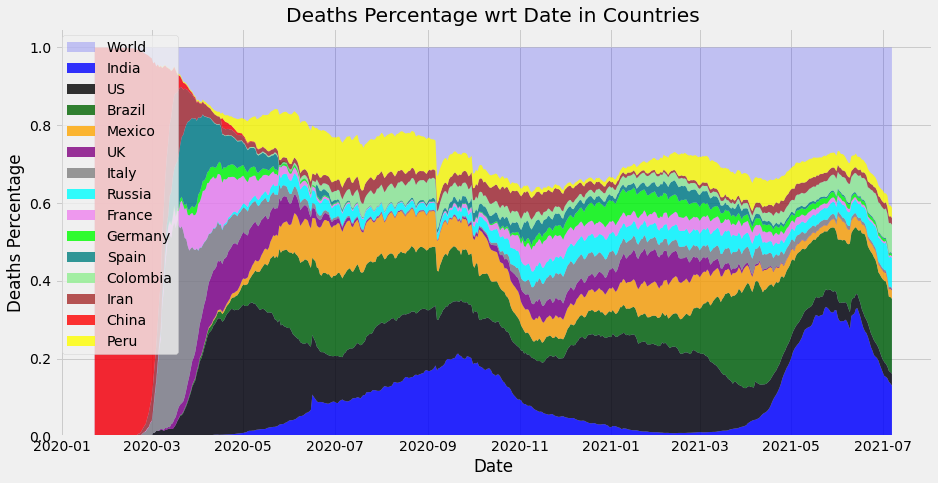

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

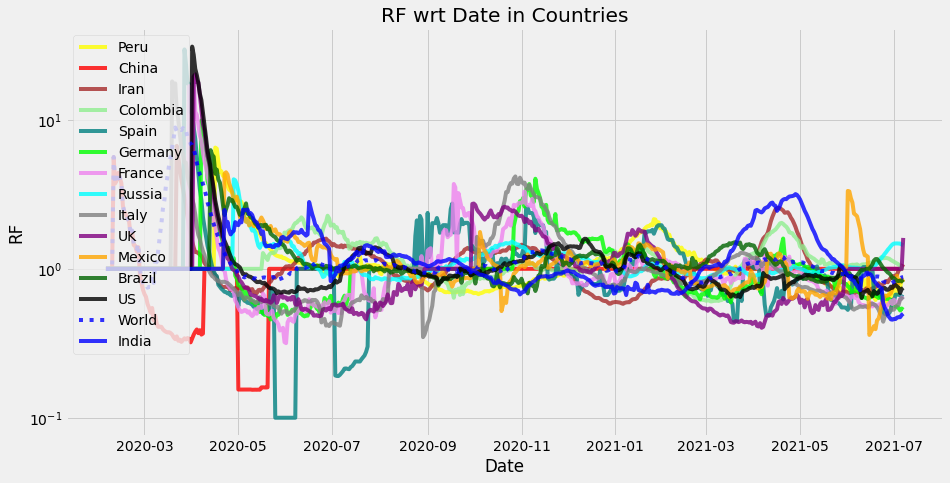

In [41]:
plotter(Reproductivity, 'RF')

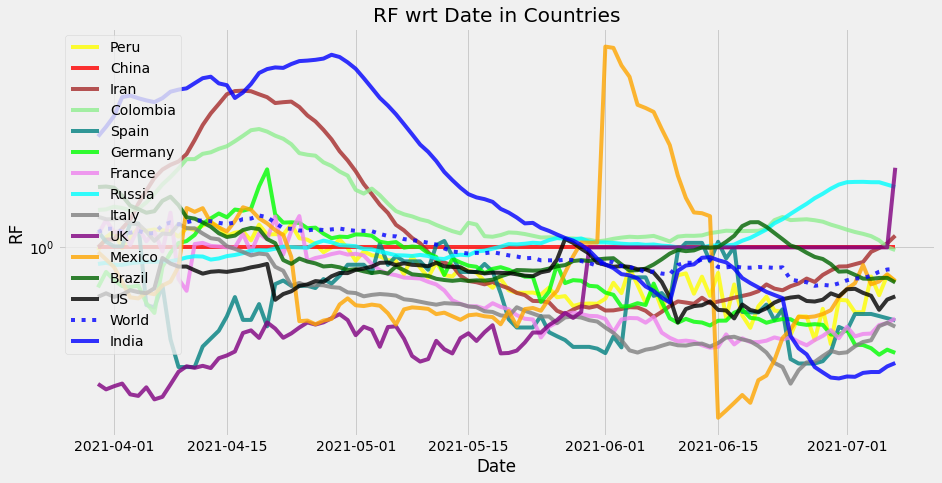

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

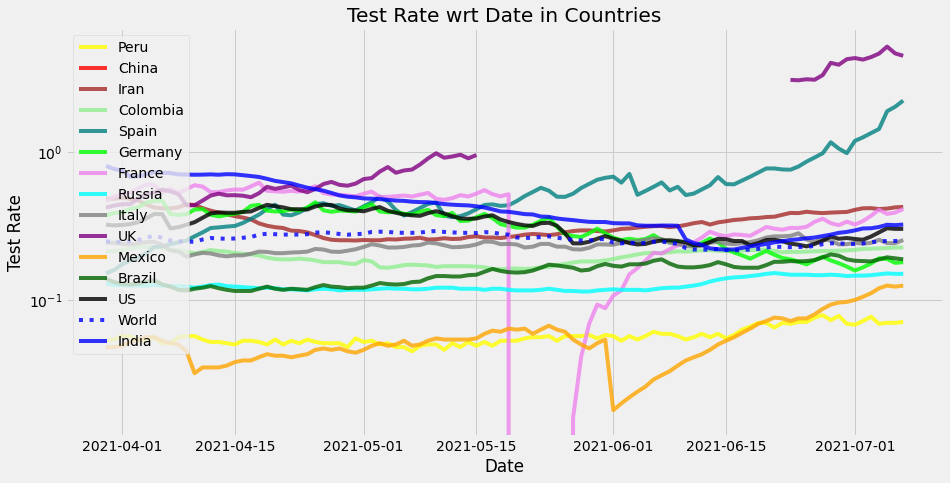

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

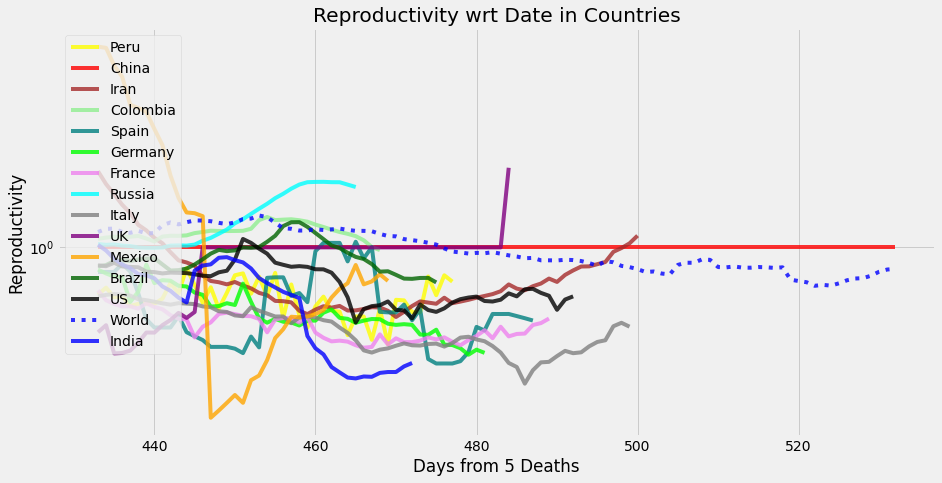

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

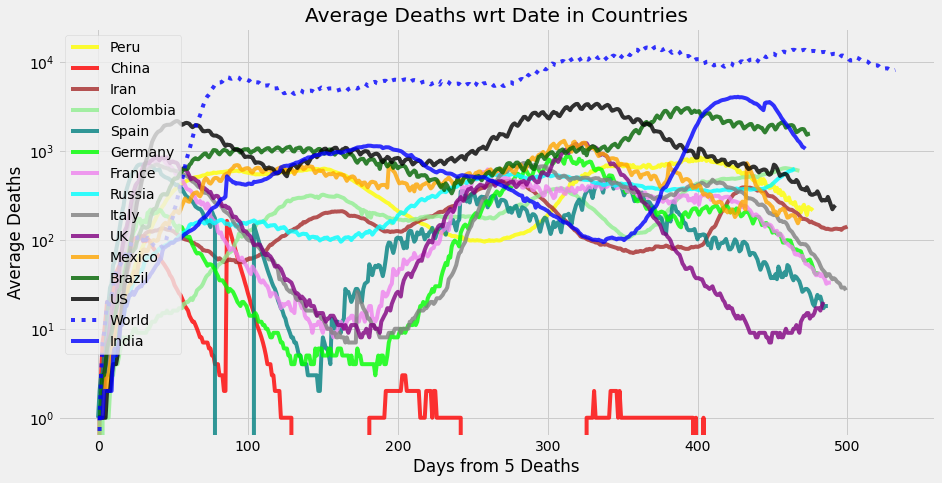

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

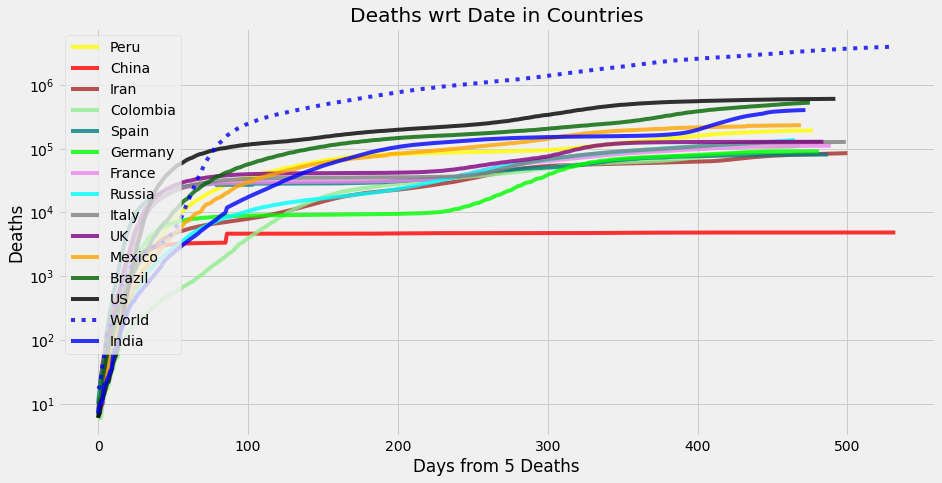

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4001746,8586,7828.71,8074.15,0.8791,185075852,0.250,404268,800.35
US,606218,312,225.57,243.99,0.7454,33770444,0.302,14744,121.24
Brazil,528540,1648,1496.29,1557.73,0.8105,18909037,0.188,58549,105.71
India,405028,817,795.57,1053.58,0.4997,30709557,0.323,68021,81.01
Mexico,234192,234,163.57,176.08,0.8179,2558369,0.125,4412,46.84
Peru,193743,155,201.71,212.72,0.8144,2071637,0.071,3040,38.75
Russia,137718,713,677.86,628.72,1.4369,5614540,0.150,18815,27.54
UK,128565,33,23.00,20.24,1.6127,5007964,4.457,18040,25.71
Italy,127718,14,21.71,26.88,0.6215,4265714,0.254,1363,25.54


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4001746,8586,7828.71,8074.15,0.8791,185075852,0.250,404268,800.35
Brazil,528540,1648,1496.29,1557.73,0.8105,18909037,0.188,58549,105.71
India,405028,817,795.57,1053.58,0.4997,30709557,0.323,68021,81.01
Russia,137718,713,677.86,628.72,1.4369,5614540,0.150,18815,27.54
Indonesia,62908,1040,631.00,549.03,2.1344,2379397,0.179,19690,12.58
Colombia,110578,559,576.29,595.75,0.9842,4426811,0.226,26956,22.12
Argentina,97439,456,447.86,476.73,0.8514,4593763,0.214,20375,19.49
South Africa,63039,411,341.71,287.30,2.0324,2112336,0.252,14473,12.61
US,606218,312,225.57,243.99,0.7454,33770444,0.302,14744,121.24


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4001746


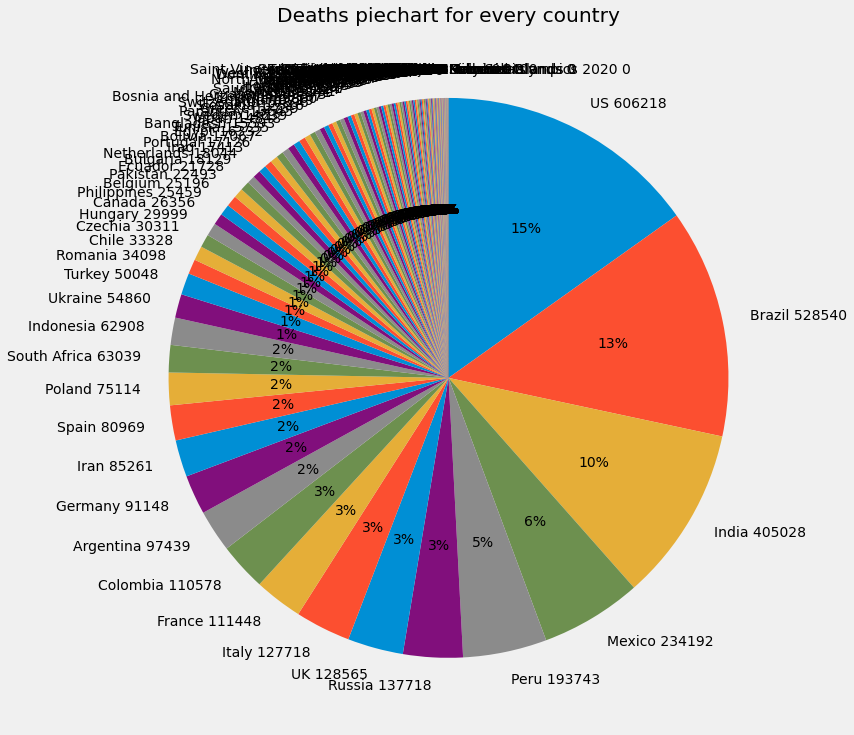

In [35]:
piechart('Deaths')

World total:  7828


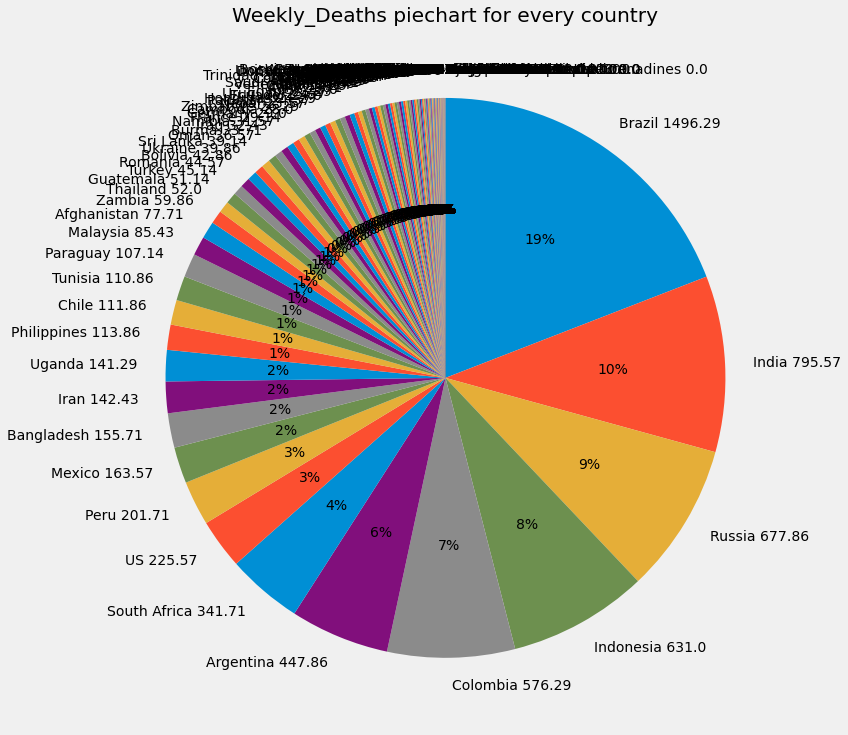

In [36]:
piechart('Weekly_Deaths')

World total:  8586


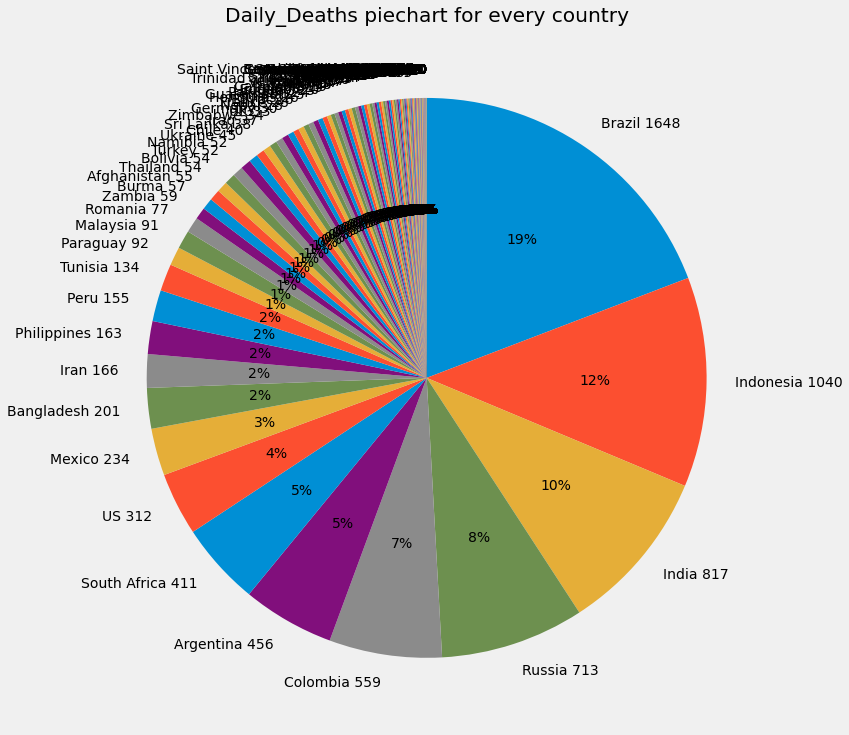

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-08


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

800349200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master f9858d2] `date` update
 1 file changed, 2125 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (68%)


To https://github.com/Arrowheadahp/COVID-19.git
   0667a29..f9858d2  master -> master
